# Projekt Eksploracji
### Michał Podolec

## Wstęp: Import i przekształcanie danych

### Wczytanie danych z pliku .csv

In [1]:
import pandas as pd
import numpy as np

d = pd.read_csv('HiED_eksploracja_26.csv')
d.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,klasa
0,0,3.727890,3.727890,-3.489029,-3.489029,-4.374913,-1.697261,-3.340340,NaN,-2.202619,1
1,1,1.305639,NaN,-1.337678,-1.337678,-4.267004,-2.029218,-2.454895,4.668916,-3.820831,1
2,2,0.080473,0.080473,-0.021093,NaN,0.087026,0.294830,2.697350,-3.003492,-0.887141,0
3,3,1.421829,1.421829,2.000774,2.000774,1.475646,-0.422832,2.267901,0.991945,-2.610357,0
4,4,-4.654744,-4.654744,-5.389263,-5.389263,-5.805720,-0.025020,-4.958819,3.608714,3.716522,5


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  230 non-null    int64  
 1   0           218 non-null    float64
 2   1           220 non-null    float64
 3   2           222 non-null    float64
 4   3           218 non-null    float64
 5   4           225 non-null    float64
 6   5           222 non-null    float64
 7   6           219 non-null    float64
 8   7           223 non-null    float64
 9   8           220 non-null    float64
 10  klasa       230 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 19.9 KB


## 1. Wstępna analiza zbioru danych

In [3]:
d.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,klasa
count,230.000000,218.000000,220.000000,222.000000,218.000000,225.000000,222.000000,219.000000,223.000000,220.000000,230.000000
mean,114.500000,-0.069608,-0.016487,-0.007546,0.018659,-1.641011,-0.040240,-2.126799,1.955245,-0.971042,2.482609
std,66.539462,3.267416,3.308327,3.206314,3.204696,4.688892,1.022826,2.574314,2.600536,3.116731,1.714860
min,0.000000,-5.143208,-5.143208,-5.772597,-5.772597,-9.187591,-2.521316,-6.671241,-5.499243,-5.998411,0.000000
25%,57.250000,-3.116996,-3.072354,-2.882567,-2.873419,-5.551176,-0.676269,-3.659980,1.329464,-3.280351,1.000000
50%,114.500000,-0.292286,-0.438893,0.043273,0.170535,-2.544866,0.015111,-2.715444,2.764080,-2.408897,2.000000
75%,171.750000,2.917684,2.985629,2.786500,2.786500,3.123557,0.600970,-1.451176,3.615692,2.443416,4.000000
max,229.000000,5.682350,6.262182,6.982502,6.982502,8.710430,2.644632,4.104896,6.224215,5.833186,5.000000


Jak widać występują obiekty z brakami w danych, zbadam liczbę obiektów, w których występuje choć jeden brak

In [5]:
num_rows_with_missing = d.isnull().any(axis=1).sum()
print("Liczba obiektów z co najmniej jednym brakiem:", num_rows_with_missing)

Liczba obiektów z co najmniej jednym brakiem: 74


Jest to duża liczba, bo stanowi 74/230 obiektów w zbiorze danych, jest to za duża liczba, aby można było mówić o usunięciu wszystkich obiektów z brakiem w danych.

In [7]:
d_filled = d.copy()
for col in d.columns:
    if col != "klasa" and d[col].isnull().any():
        d_filled[col] = d.groupby("klasa")[col].transform(
            lambda x: x.fillna(x.median())
        )
d_filled.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
klasa         0
dtype: int64

In [8]:
d_filled.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,klasa
0,0,3.727890,3.727890,-3.489029,-3.489029,-4.374913,-1.697261,-3.340340,3.372708,-2.202619,1
1,1,1.305639,2.790315,-1.337678,-1.337678,-4.267004,-2.029218,-2.454895,4.668916,-3.820831,1
2,2,0.080473,0.080473,-0.021093,2.299493,0.087026,0.294830,2.697350,-3.003492,-0.887141,0
3,3,1.421829,1.421829,2.000774,2.000774,1.475646,-0.422832,2.267901,0.991945,-2.610357,0
4,4,-4.654744,-4.654744,-5.389263,-5.389263,-5.805720,-0.025020,-4.958819,3.608714,3.716522,5


In [10]:
num_rows_with_missing = d_filled.isnull().any(axis=1).sum()
print("Liczba obiektów z co najmniej jednym brakiem:", num_rows_with_missing)

Liczba obiektów z co najmniej jednym brakiem: 0


Teraz możemy poddać dane dalszej analizie

In [11]:
d_filled.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,klasa
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,114.500000,-0.015794,0.063326,-0.061919,-0.011365,-1.560998,-0.036805,-2.065672,1.966345,-0.946576,2.482609
std,66.539462,3.257100,3.298720,3.193193,3.192297,4.699196,1.005526,2.610957,2.589103,3.113799,1.714860
min,0.000000,-5.143208,-5.143208,-5.772597,-5.772597,-9.187591,-2.521316,-6.671241,-5.499243,-5.998411,0.000000
25%,57.250000,-3.116996,-3.040614,-2.913975,-2.945794,-5.256225,-0.665598,-3.614677,1.393009,-3.236987,1.000000
50%,114.500000,0.013765,0.013765,-0.212999,0.035285,-2.455527,-0.000162,-2.728197,2.797314,-2.422605,2.000000
75%,171.750000,2.917684,2.973213,2.684941,2.786500,3.227310,0.564077,-1.426754,3.608607,2.562395,4.000000
max,229.000000,5.682350,6.262182,6.982502,6.982502,8.710430,2.644632,4.104896,6.224215,5.833186,5.000000


Od razu możemy pozbyć się kolumny 'Unnamed' ponieważ zawiera ona numer id obiektu, więc nie będzie istotna podczas analizy.

In [12]:
d_filled = d_filled.drop(columns=["Unnamed: 0"])

## Podstawowe dane zbioru

Przedstawiam liczbę obiektów, liczbę atrybutów oraz nazwę kolumn

In [23]:
print("Liczba obiektów:", d_filled.shape[0])
print("Liczba atrybutów:", d_filled.shape[1])
print("Nazwy kolumn:", d_filled.columns.tolist())

Liczba obiektów: 230
Liczba atrybutów: 10
Nazwy kolumn: ['0', '1', '2', '3', '4', '5', '6', '7', '8', 'klasa']


## Analiza reprezentacji poszczególnych klas

In [18]:
num_classes = d_filled["klasa"].nunique()
class_distribution = d_filled["klasa"].value_counts().sort_index()
print("Liczba klas:", num_classes)
print("Rozkład klas:\n", class_distribution)

Liczba klas: 6
Rozkład klas:
 klasa
0    39
1    39
2    38
3    38
4    38
5    38
Name: count, dtype: int64


Widać, że w zbiorze danych występuje wyrównana reprezentacja każdej z klasy, co jest bardzo porządanym zjawiskiem w przypadku tworzenia na danym zbiorze klasyfikatora.

## Analiza atrybutów całego zbioru

Następnie przedstawiam analizę poszczególnych atrybutów w całym zbiorze. Atrybut klasyfikujący nie zostaje uwzględniony z powodu na swoją kategoryczną naturę.

In [66]:
d_filled.drop(columns=["klasa"]).describe()

,0,1,2,3,4,5,6,7,8
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,-0.015794,0.063326,-0.061919,-0.011365,-1.560998,-0.036805,-2.065672,1.966345,-0.946576
std,3.257100,3.298720,3.193193,3.192297,4.699196,1.005526,2.610957,2.589103,3.113799
min,-5.143208,-5.143208,-5.772597,-5.772597,-9.187591,-2.521316,-6.671241,-5.499243,-5.998411
25%,-3.116996,-3.040614,-2.913975,-2.945794,-5.256225,-0.665598,-3.614677,1.393009,-3.236987
50%,0.013765,0.013765,-0.212999,0.035285,-2.455527,-0.000162,-2.728197,2.797314,-2.422605
75%,2.917684,2.973213,2.684941,2.786500,3.227310,0.564077,-1.426754,3.608607,2.562395
max,5.682350,6.262182,6.982502,6.982502,8.710430,2.644632,4.104896,6.224215,5.833186


## Analiza atrybutów ze względu na klasy obiektów

In [113]:
for klasa in sorted(d_filled["klasa"].unique()):
    print(f"Analiza wartości atrybutów dla klasy {klasa}:")
    display(d_filled[d_filled["klasa"] == klasa].describe())

📌 Statystyki opisowe dla klasy 0:


,0,1,2,3,4,5,6,7,8,klasa
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,3.351798,3.433198,2.580740,2.640437,3.391296,0.156008,3.032659,3.041868,-2.915322,0.0
std,1.590006,1.627778,1.540801,1.481294,1.399901,0.863130,0.569948,1.728931,0.585909,0.0
min,-0.147722,-0.147722,-0.021093,0.107640,0.087026,-1.979862,1.861219,-3.003492,-4.104762,0.0
25%,2.598399,2.598399,1.620642,1.811723,2.525711,-0.171849,2.659662,2.255094,-3.208300,0.0
50%,3.606891,3.840294,2.291890,2.299493,3.526664,0.288793,3.108923,3.099670,-2.962995,0.0
75%,4.420556,4.583049,3.342271,3.342271,4.222442,0.548600,3.433573,4.255427,-2.560303,0.0
max,5.554321,5.554321,5.839635,5.839635,7.016397,1.926748,4.104896,6.224215,-0.887141,0.0


📌 Statystyki opisowe dla klasy 1:


,0,1,2,3,4,5,6,7,8,klasa
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,2.667740,2.921680,-2.753697,-2.751598,-4.509664,-0.073109,-2.873467,3.228591,-2.872132,1.0
std,1.231951,1.229837,0.940346,0.928558,1.545086,1.096682,1.004063,1.169156,1.557004,0.0
min,0.365813,0.677002,-4.451340,-4.451340,-7.792420,-2.443680,-5.728933,0.321806,-5.998411,1.0
25%,1.928193,2.275910,-3.485475,-3.487597,-5.418293,-0.576241,-3.384821,2.627104,-3.650798,1.0
50%,2.566582,2.790315,-2.779126,-2.779126,-4.393174,-0.116603,-2.879305,3.372708,-2.835353,1.0
75%,3.487099,3.697936,-2.196865,-2.196865,-3.601674,0.432580,-2.412934,3.941500,-1.946529,1.0
max,4.881938,6.262182,-0.679945,-0.679945,-1.673479,2.081939,-0.821019,5.863128,0.568882,1.0


📌 Statystyki opisowe dla klasy 2:


,0,1,2,3,4,5,6,7,8,klasa
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,-3.017192,-2.969990,2.641852,2.662414,-2.891517,-0.017363,-3.405246,3.054442,-3.110833,2.0
std,1.137286,1.088418,1.231172,1.238414,2.024737,1.050609,1.570436,1.313069,1.225834,0.0
min,-5.143208,-5.143208,0.301912,0.301912,-6.343891,-2.212844,-6.671241,-0.413249,-5.444830,2.0
25%,-3.616073,-3.591943,2.095322,2.095322,-4.178288,-0.689718,-4.467493,2.353621,-3.788807,2.0
50%,-3.222125,-3.218593,2.684941,2.761865,-3.258966,0.035748,-3.205786,2.902091,-3.082725,2.0
75%,-2.504478,-2.504478,3.331391,3.375168,-2.099676,0.649823,-2.423666,3.817299,-2.182236,2.0
max,-0.052943,-0.052943,5.347315,5.347315,3.079991,2.541733,-0.225079,5.983346,-0.441904,2.0


📌 Statystyki opisowe dla klasy 3:


,0,1,2,3,4,5,6,7,8,klasa
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,-2.983849,-2.906161,-3.050806,-3.014115,-7.666148,-0.116054,-2.822697,2.943894,-3.042928,3.0
std,1.200010,1.229064,1.355381,1.463200,0.755301,1.147520,1.387400,0.605607,0.917592,0.0
min,-4.966955,-4.966955,-5.724506,-5.724506,-9.187591,-2.198555,-5.483363,1.659151,-4.762326,3.0
25%,-3.899611,-3.899611,-4.133216,-4.267543,-8.214060,-0.798813,-3.894738,2.460454,-3.707637,3.0
50%,-3.118752,-3.049104,-3.097940,-3.036565,-7.542197,-0.093140,-2.850253,3.089915,-3.008929,3.0
75%,-2.259246,-2.251696,-2.061462,-1.895509,-7.092118,0.708449,-1.563668,3.346737,-2.506619,3.0
max,-0.436849,-0.436849,-0.037070,-0.037070,-6.275708,1.979807,-0.123825,4.047821,-1.374966,3.0


📌 Statystyki opisowe dla klasy 4:


,0,1,2,3,4,5,6,7,8,klasa
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,2.748682,2.787729,3.061225,3.254623,4.789824,-0.102161,-2.862739,-2.977763,3.053215,4.0
std,1.552222,1.552026,1.972089,1.498456,2.226647,0.981657,1.256989,1.412884,1.435992,0.0
min,-4.276047,-4.276047,-4.623915,-0.472254,-5.233678,-2.085665,-5.498913,-5.499243,0.181672,4.0
25%,2.136084,2.155237,2.256647,2.316726,4.113538,-0.676269,-3.625319,-3.715026,1.924276,4.0
50%,2.700634,2.802137,3.281852,3.237438,5.001983,-0.047668,-2.698374,-2.970120,3.272354,4.0
75%,3.714306,3.714306,4.428479,4.428479,6.180706,0.393873,-2.109016,-2.292023,4.103978,4.0
max,5.682350,5.682350,6.982502,6.982502,8.710430,2.644632,0.573844,3.305424,5.833186,4.0


📌 Statystyki opisowe dla klasy 5:


,0,1,2,3,4,5,6,7,8,klasa
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,-3.021182,-3.050398,-2.849532,-2.857622,-2.532503,-0.072267,-3.575453,2.445518,3.311027,5.0
std,1.179955,1.140817,1.685184,1.675998,2.252485,0.905600,1.158121,1.578360,0.627843,0.0
min,-5.018272,-5.018272,-5.772597,-5.772597,-6.612364,-2.521316,-6.410727,-1.368636,2.133464,5.0
25%,-3.706648,-3.706648,-3.627264,-3.554720,-3.998803,-0.654414,-4.381489,1.656217,2.909628,5.0
50%,-3.023517,-3.023517,-3.009542,-3.035146,-2.403921,-0.049358,-3.614677,2.507372,3.239538,5.0
75%,-2.498014,-2.498014,-2.074299,-2.074299,-1.512895,0.649326,-2.748765,3.596159,3.707722,5.0
max,1.156509,1.156509,3.617261,3.617261,5.064461,1.539588,-1.185597,5.925155,4.639772,5.0


# Odchylenia standardowe

### Korzystając z wcześniejszych DataFrame-ów badam wartości odchyleń standardowych dla całego zbioru.

In [80]:
d_filled.drop(columns=["klasa"]).std()

0    3.257100
1    3.298720
2    3.193193
3    3.192297
4    4.699196
5    1.005526
6    2.610957
7    2.589103
8    3.113799
dtype: float64

In [81]:
std = d_filled.drop(columns=["klasa"]).std()

# Maksymalna wartość std i jej kolumna
max_std_value = std.max()
max_std_column = std.idxmax()

# Minimalna wartość std i jej kolumna
min_std_value = std.min()
min_std_column = std.idxmin()

print("Największe std:", max_std_value, "w kolumnie:", max_std_column)
print("Najmniejsze std:", min_std_value, "w kolumnie:", min_std_column)

Największe std: 4.69919594075893 w kolumnie: 4
Najmniejsze std: 1.0055259890605366 w kolumnie: 5


Wynika z tego, że atrybut o największym odchyleniu standardowym to atrybut 4.
Natomiast atrybut o najmniejszym odchyleniu standardowym to atrybut 5.

### Poniżej przedstawiam wartość odchylenia standardowego dla danych atrybutów w poszczególnych klasach

In [91]:
grouped_stats = d_filled.groupby("klasa").std()
grouped_stats

,0,1,2,3,4,5,6,7,8
klasa,,,,,,,,,
0,1.590006,1.627778,1.540801,1.481294,1.399901,0.863130,0.569948,1.728931,0.585909
1,1.231951,1.229837,0.940346,0.928558,1.545086,1.096682,1.004063,1.169156,1.557004
2,1.137286,1.088418,1.231172,1.238414,2.024737,1.050609,1.570436,1.313069,1.225834
3,1.200010,1.229064,1.355381,1.463200,0.755301,1.147520,1.387400,0.605607,0.917592
4,1.552222,1.552026,1.972089,1.498456,2.226647,0.981657,1.256989,1.412884,1.435992
5,1.179955,1.140817,1.685184,1.675998,2.252485,0.905600,1.158121,1.578360,0.627843


In [100]:
for klasa in grouped_stats.index:
    stds = grouped_stats.loc[klasa]
    max_col = stds.idxmax()
    max_val = stds.max()
    min_col = stds.idxmin()
    min_val = stds.min()

    print(f"Klasa {klasa}:")
    print(f"Największe std: {max_val:.4f} dla atrybutu '{max_col}'")
    print(f"Najmniejsze std: {min_val:.4f} dla atrybutu '{min_col}'\n")

Klasa 0:
Największe std: 1.7289 dla atrybutu '7'
Najmniejsze std: 0.5699 dla atrybutu '6'

Klasa 1:
Największe std: 1.5570 dla atrybutu '8'
Najmniejsze std: 0.9286 dla atrybutu '3'

Klasa 2:
Największe std: 2.0247 dla atrybutu '4'
Najmniejsze std: 1.0506 dla atrybutu '5'

Klasa 3:
Największe std: 1.4632 dla atrybutu '3'
Najmniejsze std: 0.6056 dla atrybutu '7'

Klasa 4:
Największe std: 2.2266 dla atrybutu '4'
Najmniejsze std: 0.9817 dla atrybutu '5'

Klasa 5:
Największe std: 2.2525 dla atrybutu '4'
Najmniejsze std: 0.6278 dla atrybutu '8'



Powyżej widać jakie atrybuty poszczególnych klas obiektów mają największe i najmniejsze wartości odchyleń standardowych.

## Rozstępy

Wartości rozstępów ('range') poszczególnych atrybutów dla całego zbioru

In [104]:
ranges = d_filled.drop(columns=["klasa"]).agg(["min", "max"])
ranges.loc["range"] = ranges.loc["max"] - ranges.loc["min"]
ranges.T

,min,max,range
0,-5.143208,5.682350,10.825558
1,-5.143208,6.262182,11.405390
2,-5.772597,6.982502,12.755099
3,-5.772597,6.982502,12.755099
4,-9.187591,8.710430,17.898020
5,-2.521316,2.644632,5.165948
6,-6.671241,4.104896,10.776137
7,-5.499243,6.224215,11.723458
8,-5.998411,5.833186,11.831597


In [107]:
range_values = ranges.T["range"]

max_range = range_values.max()
max_range_attr = range_values.idxmax()

min_range = range_values.min()
min_range_attr = range_values.idxmin()

print(f"Największy rozstęp: {max_range:.4f} dla atrybutu '{max_range_attr}'")
print(f"Najmniejszy rozstęp: {min_range:.4f} dla atrybutu '{min_range_attr}'")

Największy rozstęp: 17.8980 dla atrybutu '4'
Najmniejszy rozstęp: 5.1659 dla atrybutu '5'


Wartości rozstępów dla poszczególnych atrybutów dla danych klas obiektów

In [108]:
min_vals = d_filled.groupby("klasa").min()
max_vals = d_filled.groupby("klasa").max()

# Obliczamy range jako różnicę
range_vals = max_vals - min_vals

# Wyświetlamy
range_vals

,0,1,2,3,4,5,6,7,8
klasa,,,,,,,,,
0,5.702044,5.702044,5.860728,5.731996,6.929372,3.906610,2.243678,9.227707,3.217621
1,4.516125,5.585181,3.771394,3.771394,6.118942,4.525619,4.907914,5.541321,6.567293
2,5.090266,5.090266,5.045402,5.045402,9.423882,4.754577,6.446163,6.396595,5.002926
3,4.530106,4.530106,5.687436,5.687436,2.911883,4.178362,5.359538,2.388670,3.387361
4,9.958397,9.958397,11.606417,7.454756,13.944107,4.730296,6.072758,8.804668,5.651514
5,6.174781,6.174781,9.389858,9.389858,11.676825,4.060904,5.225130,7.293791,2.506308


In [109]:
for klasa in range_vals.index:
    stds = range_vals.loc[klasa]
    max_col = stds.idxmax()
    max_val = stds.max()
    min_col = stds.idxmin()
    min_val = stds.min()

    print(f"Klasa {klasa}:")
    print(f"  Największy rozstęp: {max_val:.4f} w kolumnie '{max_col}'")
    print(f"  Najmniejszy rozstęp: {min_val:.4f} w kolumnie '{min_col}'\n")

Klasa 0:
  Największy rozstęp: 9.2277 w kolumnie '7'
  Najmniejszy rozstęp: 2.2437 w kolumnie '6'

Klasa 1:
  Największy rozstęp: 6.5673 w kolumnie '8'
  Najmniejszy rozstęp: 3.7714 w kolumnie '2'

Klasa 2:
  Największy rozstęp: 9.4239 w kolumnie '4'
  Najmniejszy rozstęp: 4.7546 w kolumnie '5'

Klasa 3:
  Największy rozstęp: 5.6874 w kolumnie '2'
  Najmniejszy rozstęp: 2.3887 w kolumnie '7'

Klasa 4:
  Największy rozstęp: 13.9441 w kolumnie '4'
  Najmniejszy rozstęp: 4.7303 w kolumnie '5'

Klasa 5:
  Największy rozstęp: 11.6768 w kolumnie '4'
  Najmniejszy rozstęp: 2.5063 w kolumnie '8'



Powyżej widzimy jakie atrybuty w poszczególnych klasach obiektów charaktaryzują się największą i najmniejszą różnicą skrajnych wartosci

# Wnioski

Dla każdego z atrybutów widać, że wartości odchyleń standardowych są większe, gdy analizujemy cały zbiór bez rozróżniania klas, niż wtedy gdy rozdzielimy dane według klas. Świadczy to o tym, że zmienność wewnątrz poszczególnych klas jest mniejsza. Dodatkowo, rozstępy w obrębie każdej klasy są zróżnicowane, co oznacza, że zakresy wartości cech różnią się między klasami. Na tej podstawie można przypuszczać, że dane tworzą skupiska odpowiadające klasom, jednak nie są one wyraźnie odseparowane. Klasy częściowo się pokrywają lub przenikają w przestrzeni cech.

# 2 Wizualizacja zbioru danych

## Macierz wykresów punktowych

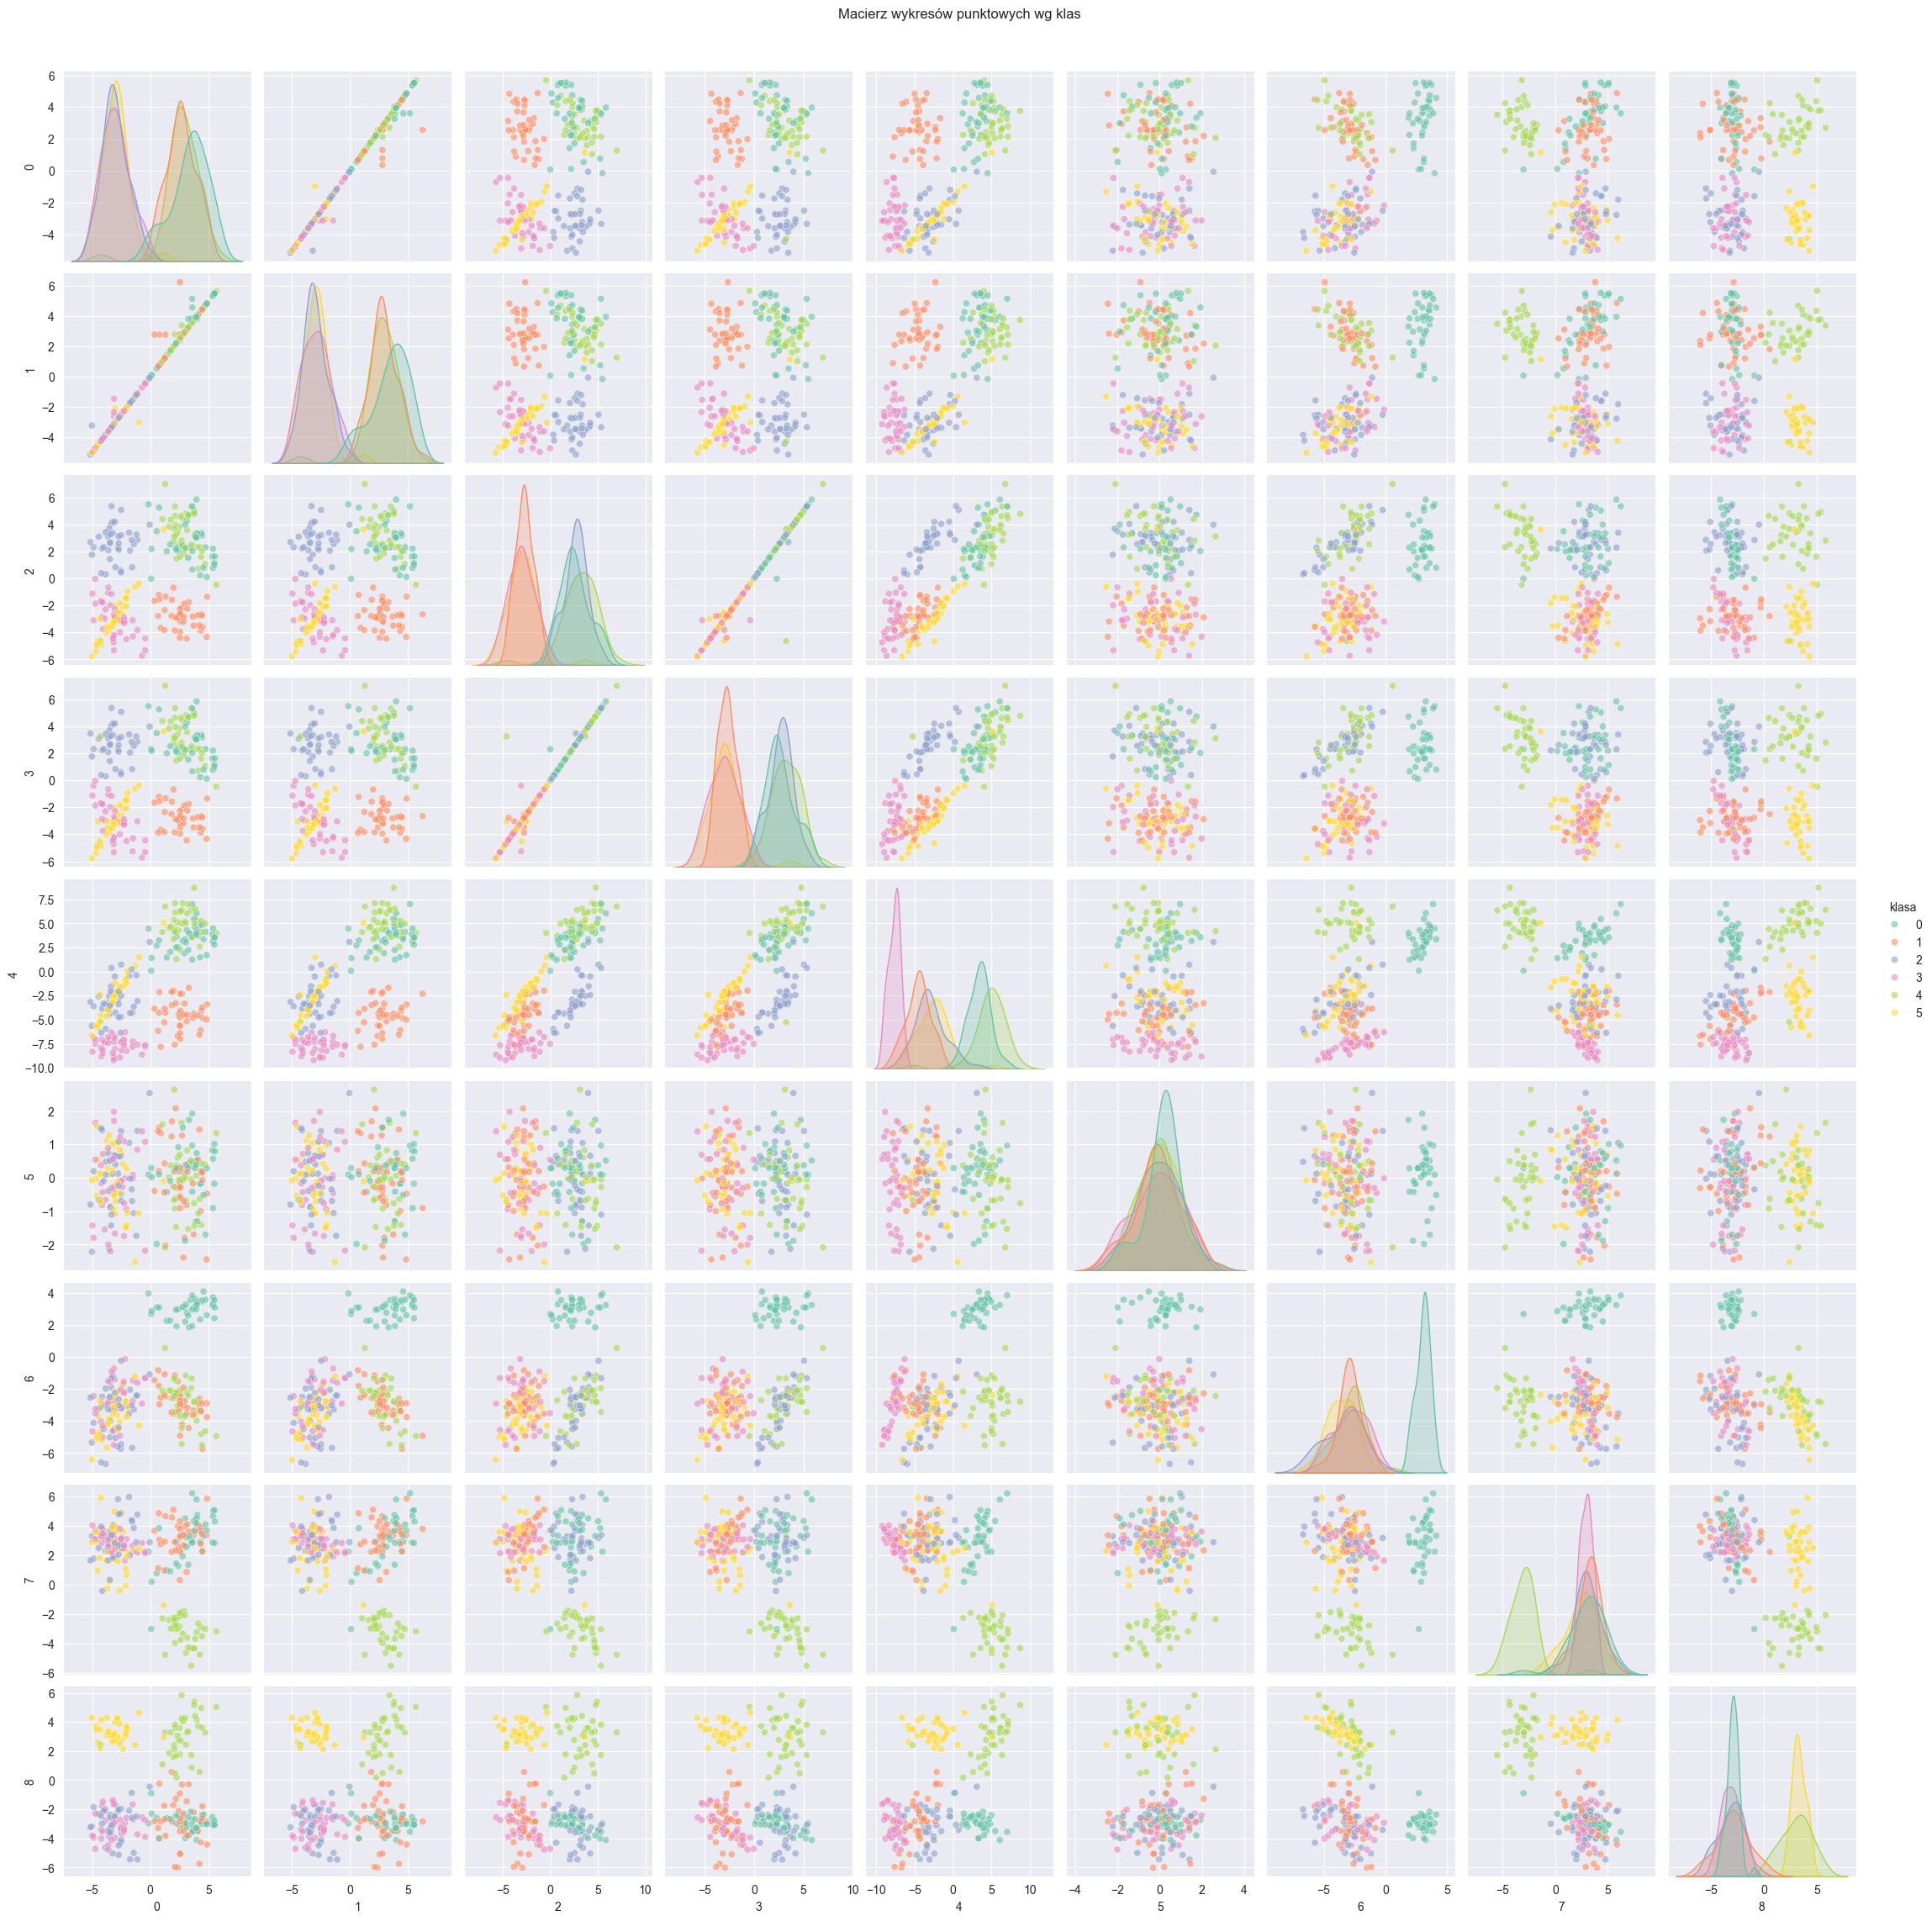

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = d_filled.columns.drop("klasa")

sns.pairplot(d_filled, vars=numeric_cols, hue="klasa", palette="Set2", diag_kind="kde", plot_kws={"alpha": 0.6})
plt.suptitle("Macierz wykresów punktowych wg klas", y=1.02)
plt.show()

## Macierz korelacji

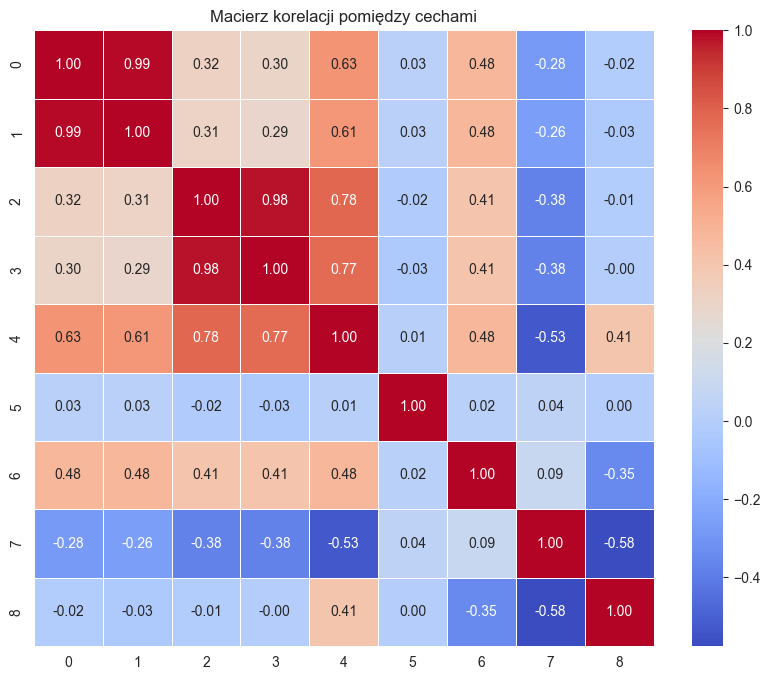

In [119]:
correlation_matrix = d_filled.drop(columns=["klasa"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji pomiędzy cechami")
plt.show()

In [121]:
correlation_matrix = d_filled.drop(columns=["klasa"]).corr()

corr_pairs_unique = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

corr_series = corr_pairs_unique.stack().sort_values(ascending=False)

print("Najsilniejsze dodatnie korelacje:")
print(corr_series.head(5))

print("\nNajsilniejsze ujemne korelacje:")
print(corr_series.tail(5))

Najsilniejsze dodatnie korelacje:
0  1    0.991702
2  3    0.980712
   4    0.779002
3  4    0.768864
0  4    0.626133
dtype: float64

Najsilniejsze ujemne korelacje:
6  8   -0.347850
2  7   -0.377884
3  7   -0.378083
4  7   -0.527365
7  8   -0.576255
dtype: float64


Co możesz wywnioskować po uruchomieniu?
Czy klasy tworzą widoczne skupiska – jeśli tak, atrybut decyzyjny dobrze odwzorowuje struktury danych.

Czy są cechy redundantne (silnie skorelowane) — kandydaci do usunięcia lub redukcji wymiarowości.

